In [1]:
#import dataset from local storge
import pandas as pd 
import numpy as np
import seaborn as sns
cd= pd.read_csv("D:\Car Datset\car data.csv")
cd

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [2]:
cd.describe                #Gives column name,mean, std , 25%, 50%, 75% and 100%
cd.shape                   # Row X Column
cd.size                    # Total = Column X Row 

2709

In [3]:
# Check missing value
cd.isnull   # Shoiw indivial row 
cd.isnull().sum() # Gives total number of missing values in table


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
#Check unique value from each row

for column in cd.columns:
    print(column, ":", cd[column].nunique())

Car_Name : 98
Year : 16
Selling_Price : 156
Present_Price : 147
Kms_Driven : 206
Fuel_Type : 3
Seller_Type : 2
Transmission : 2
Owner : 3


In [5]:
#Correlation in dataset
cd.select_dtypes(include='number').corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [6]:
[cd.columns]

[Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
       dtype='object')]

In [7]:
cat_data = [column for column in cd.columns if cd[column].dtypes in ['object', 'category']]
cat_data

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [8]:
num_data= [column for column in cd.columns if cd[column].dtypes in['int64', 'float64']]
num_data

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

# Univarient Analysis


## Catagorical datadatype

<Axes: xlabel='count', ylabel='Car_Name'>

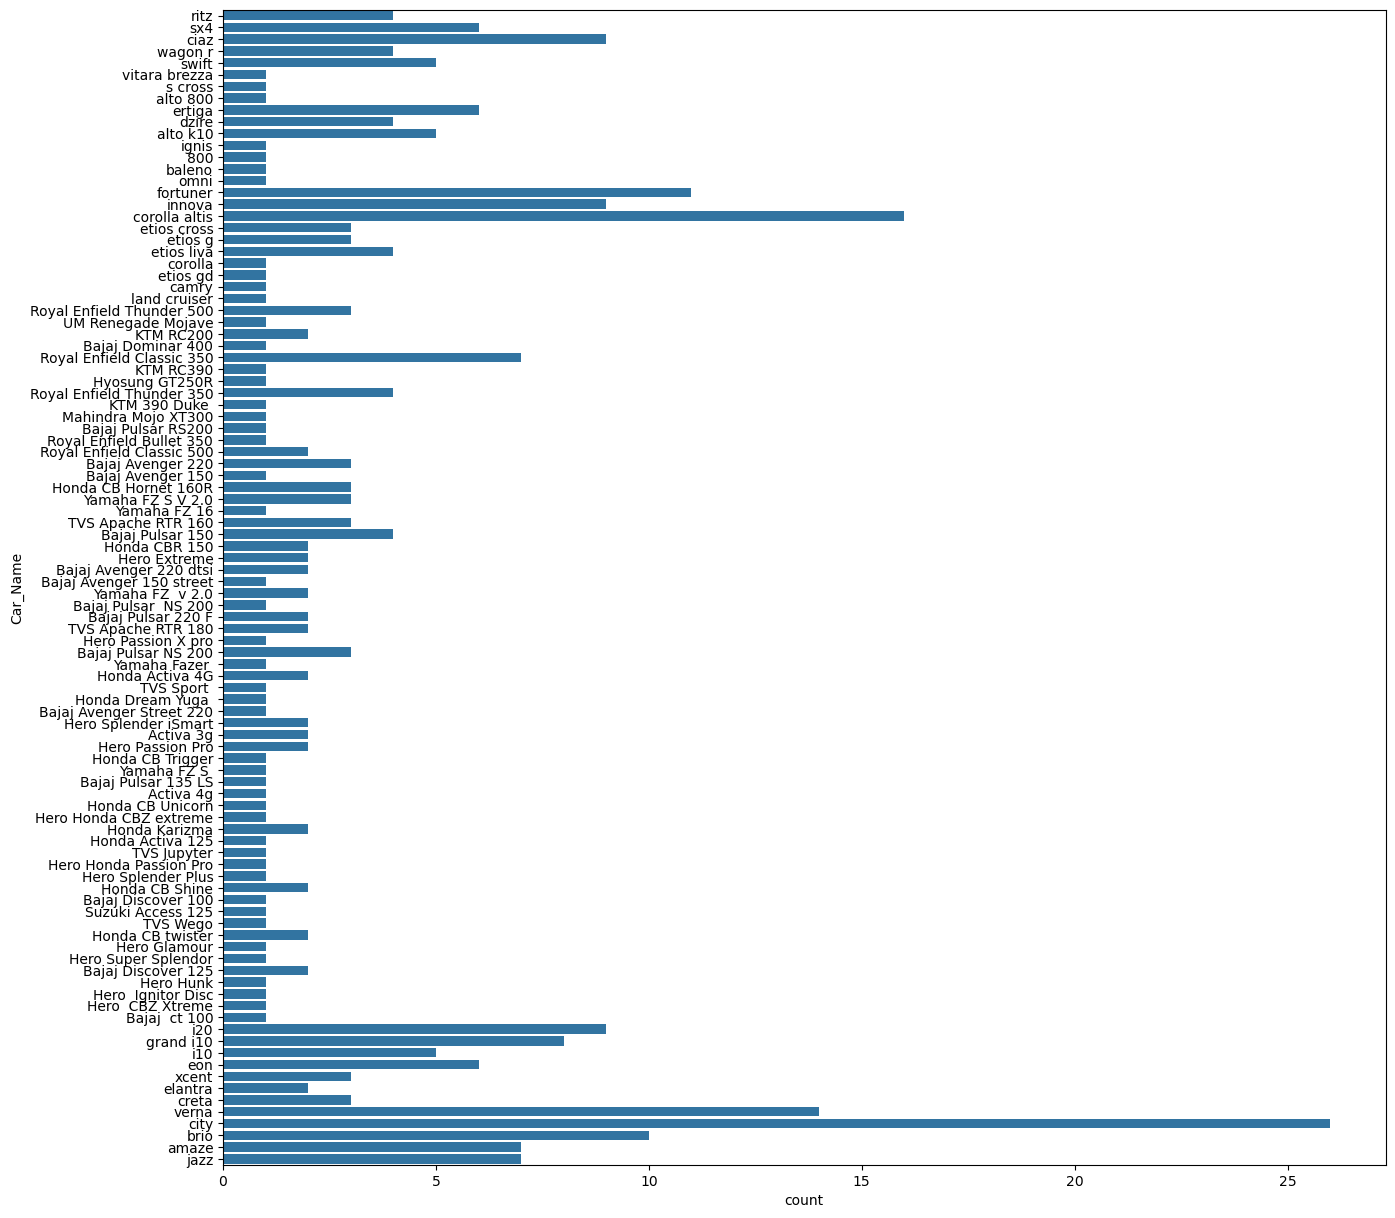

In [68]:
#Countn plot

import matplotlib.pyplot as plt
plt.figure(figsize= (15 , 15))
sns.countplot(y= cd['Car_Name'])



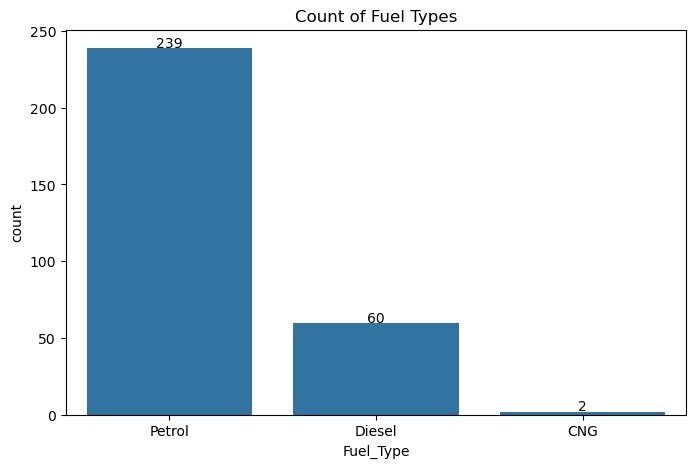

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="Fuel_Type", data=cd)

#Code from GPT to print count number on bars of count plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5,   # position
            int(height), ha="center")                   # value

plt.title("Count of Fuel Types")
plt.show()

<Axes: ylabel='count'>

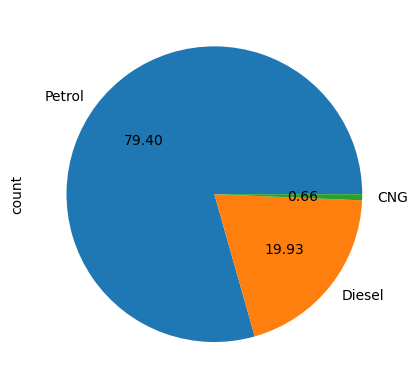

In [70]:
cd["Fuel_Type"].value_counts().plot(kind="pie",autopct='%.2f')

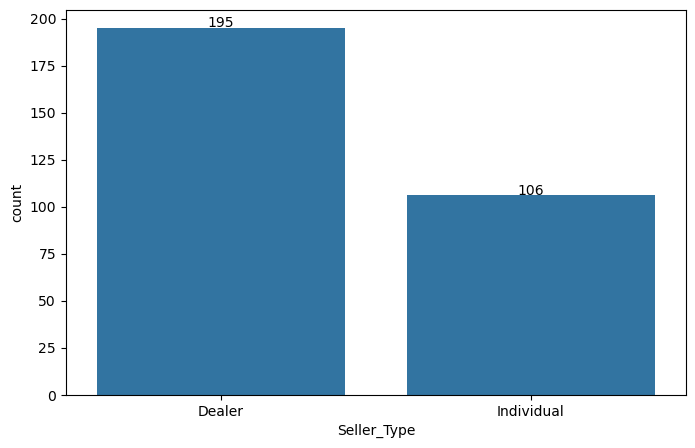

In [71]:
#Code from GPT to print number on bars of count plot
plt.figure(figsize=(8,5))
ax = sns.countplot(x=cd["Seller_Type"], data=cd)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5,   # position
            int(height), ha="center")                   # value

<Axes: ylabel='count'>

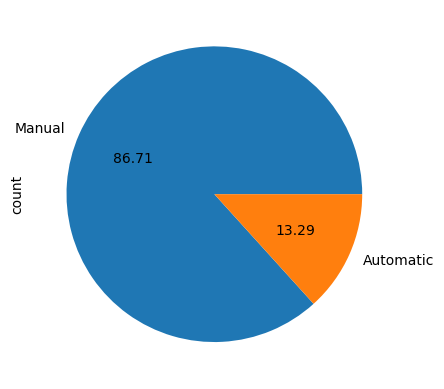

In [72]:
cd['Transmission'].value_counts().plot(kind="pie",autopct='%.2f')

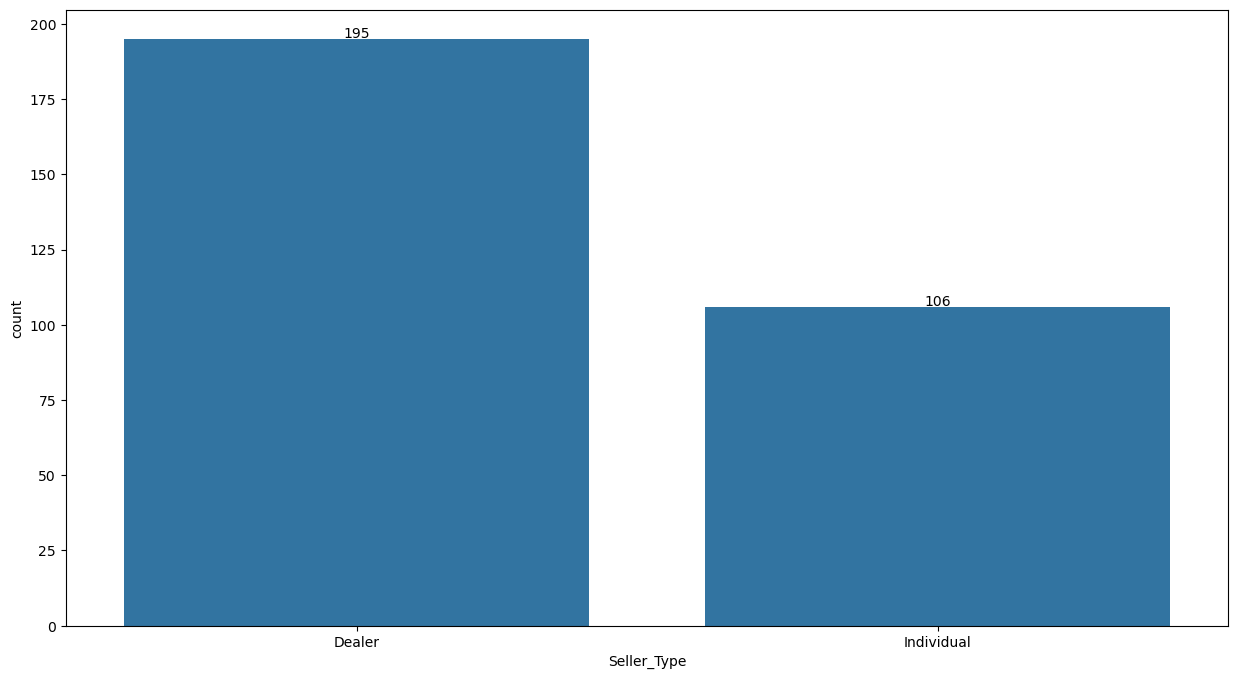

In [73]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Seller_Type", data=cd)

for p in ax.patches:
    height = p.get_height()  # <-- call the method!
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha="center")

plt.show()

## Numerical Data

In [80]:
num_data

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

<Axes: xlabel='Kms_Driven', ylabel='Count'>

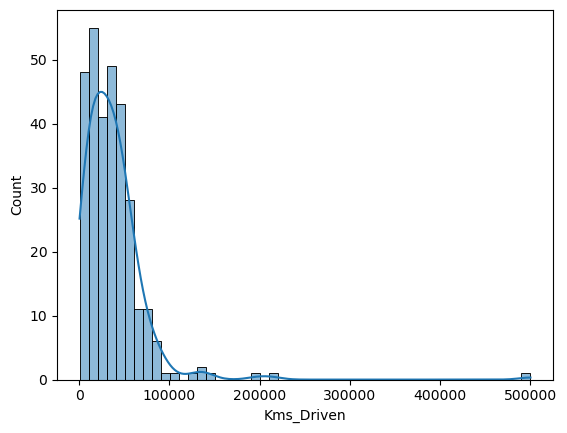

In [74]:
sns.histplot(cd['Kms_Driven'],kde=True)

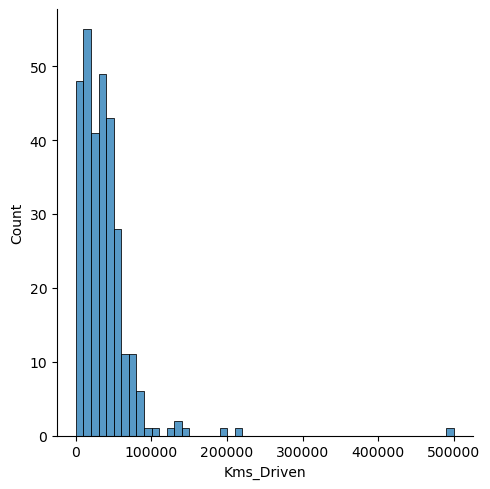

In [75]:
sns.displot(cd["Kms_Driven"])

In [76]:
q1 = cd["Kms_Driven"].quantile(0.25)
q2 = cd["Kms_Driven"].quantile(0.50)
q3 = cd["Kms_Driven"].quantile(0.75)
iqr = q3 - q1
Upper_fence = q3 + 1.5 * iqr
Lower_fence = q1 - 1.5* iqr

if Lower_fence > 0:
    Lower_fence = Lower_fence
else:
    Lower_fence = 0


print(f"Upper_fence is : {Upper_fence}")
print(f"Lower_fence is : {Lower_fence}")

Upper_fence is : 99417.5
Lower_fence is : 0


<Axes: xlabel='Kms_Driven'>

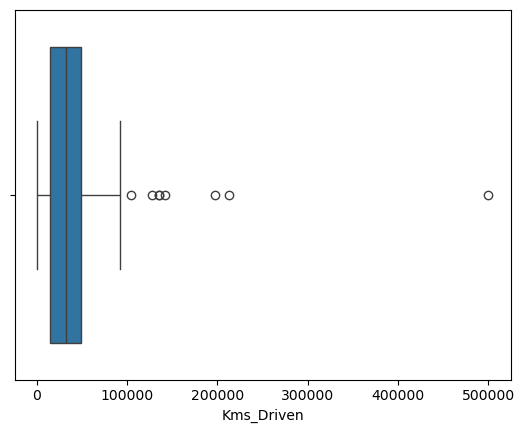

In [77]:
# Box plot
sns.boxplot(x= cd["Kms_Driven"])

In [78]:
# Show skewness 
skew = cd["Kms_Driven"].skew()*100  # 643.60 show data is strongly right skewed 
skew

np.float64(643.6012679752193)

In [79]:
normal = 1-skew
normal

np.float64(-642.6012679752193)

<Axes: xlabel='Year', ylabel='Count'>

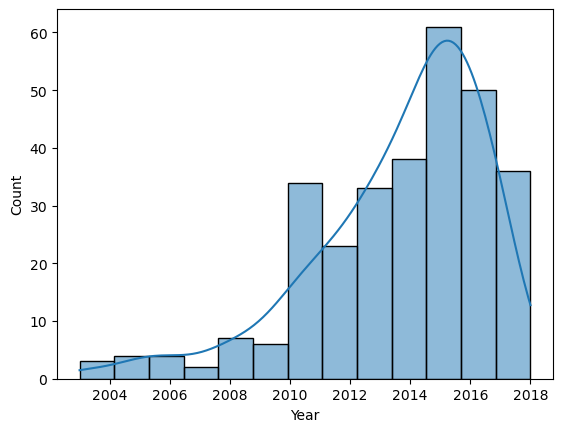

In [83]:
# Histogram of year
sns.histplot(cd["Year"],kde=True)

In [86]:
skew2= cd["Year"].skew()
skew2

np.float64(-1.2461891109538386)

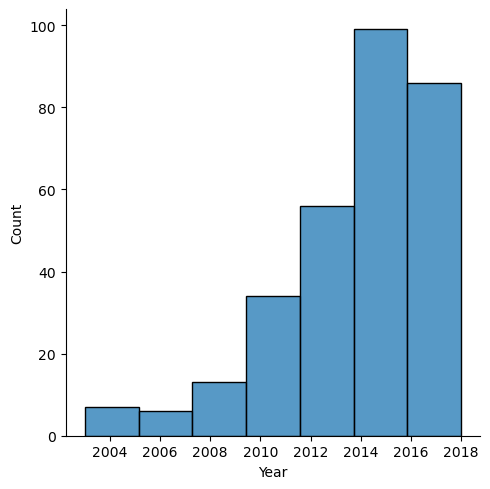

In [88]:
sns.displot( cd["Year"],bins=7)

<Axes: xlabel='Year'>

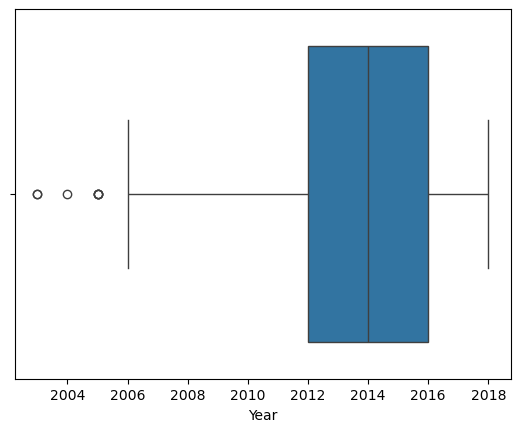

In [90]:
sns.boxplot( x= cd["Year"])

# Bivarient analysis

<Axes: xlabel='Seller_Type', ylabel='Car_Name'>

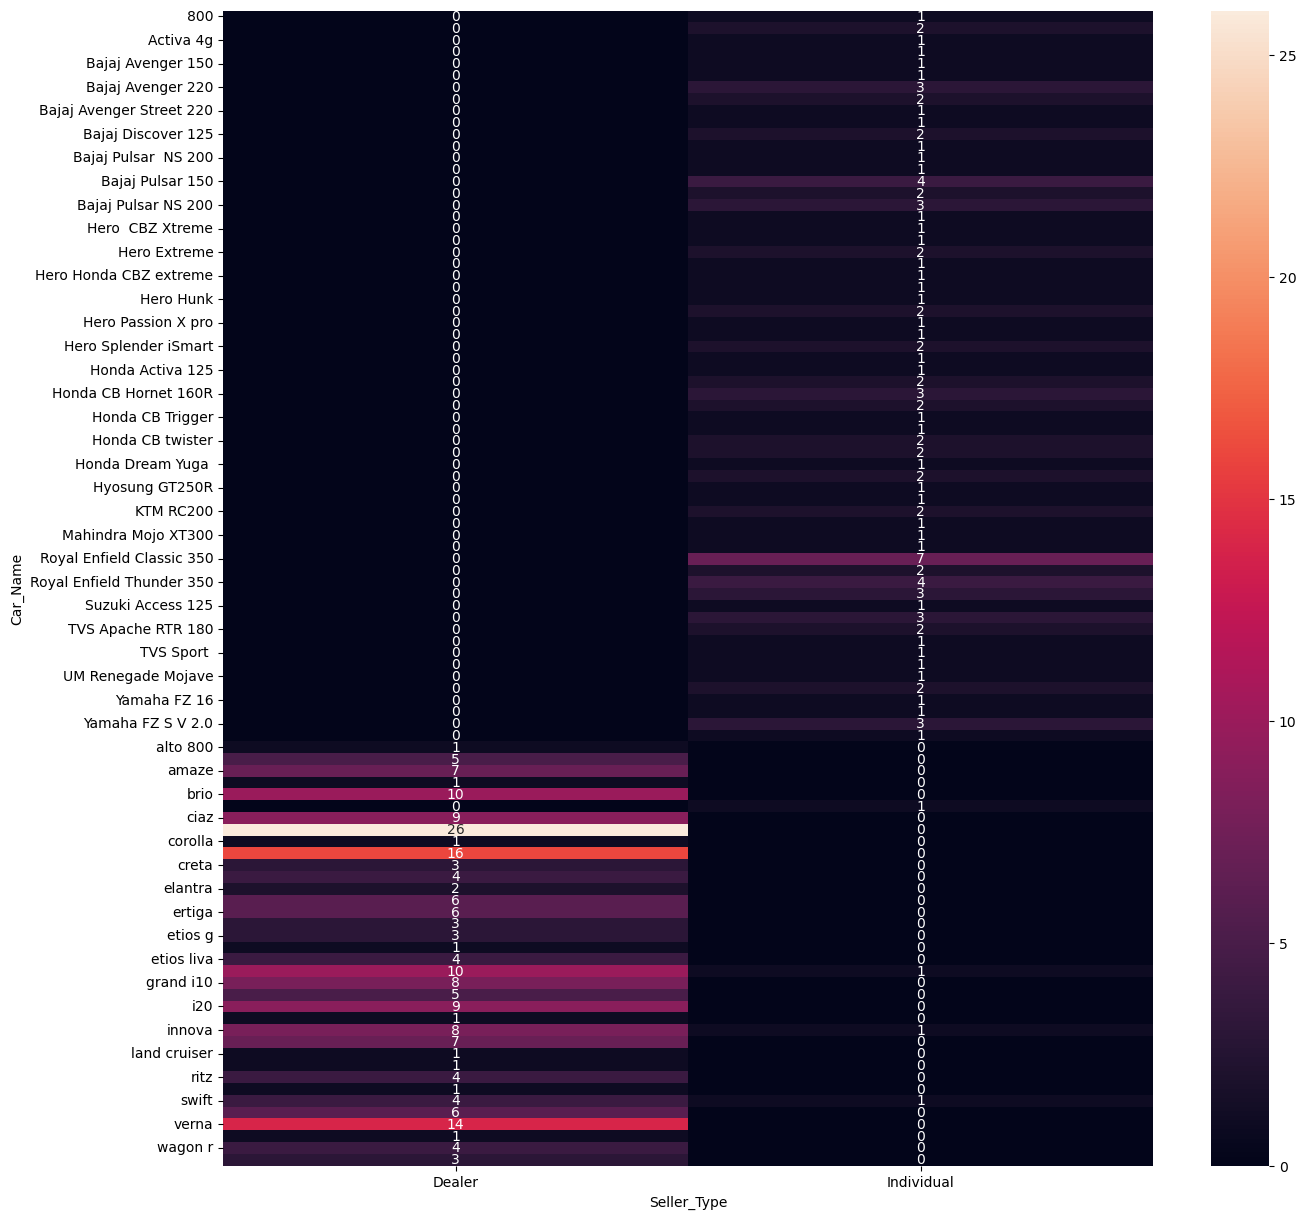

In [96]:
#Heatmap
plt.figure(figsize=(15,15))
cross_tab = pd.crosstab(cd["Car_Name"],cd["Seller_Type"])
sns.heatmap(cross_tab,annot=True)